# Case Study 3: Quality Control

## Objectives

After this tutorial you will be able to:

*   Link all the steps of a typical data science project
*   Predict product properties to ensure consistent quality and reduce defects

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#problem">Problem Definition</a>
    </li>
    <br>
    <li>
        <a href="#import">Data Collection</a>
    </li>
    <br>
    <li>
        <a href="#clean">Data Cleaning and Preparation</a>
    </li>
    <br>
    <li>
        <a href="#eda">Exploratory Data Analysis</a>
    </li>
    <br>
    <li>
        <a href="#model">Model Development and Evaluation</a>
    </li>
    <br>
    <li>
        <a href="#deploy">Deployment and Communication</a>
    </li>
    <br>
</ol>


<hr id="problem">

<h2>1. Problem Definition</h2>

<h3>Background:</h3>

Cement production is a complex process involving grinding raw materials, heating them to form clinker, and then grinding the clinker with other ingredients to produce the final product. One of the critical quality parameters of cement is its fineness, which signifies the particle size distribution of the powder. Finer cement generally has better strength and workability, making it desirable for many construction applications.

Currently, the company relies on the **R45 value**, the percentage of material remaining on a 45-micron sieve, as a measure of cement fineness. However, obtaining this value requires time-consuming laboratory analysis, limiting real-time production adjustments and potentially leading to inconsistent quality control.


<h3>Data:</h3>

The company provides a dataset containing various parameters related to the cement production process, including:

|   Paramters   |   Description |
|   ---         |   ---     |
|   Date/Time   |   Timestamp indicating the recording date and time.   |
|   Cement Type |   The type of cement being produced (e.g., Portland cement, blended cement).  |
|   Cement silo |   The specific silo where the cement is stored.   |
|   RHR, h  |   Rotation hours of the raw material mill. This could indicate the grinding time for the raw materials used to make the cement.   |
|   Production, t   |   Total cement production within the recorded timeframe (usually an hour).    |
|   Prod.rate, t/h  |   Cement production rate in tons per hour, calculated from the "Production" value.    |
|   PRI, %  |   Packing ratio index, likely related to the efficiency of packing cement into bags or other containers.  |
|   NAI, %  |   Net alkali index, a measure of the alkali content in the cement, which affects its strength and durability. |
|   Clinker (wet), t    |   Weight of wet clinker used in the production process. Clinker is the main ingredient of cement, produced by heating limestone and other materials.  |
|   Clinker (wet), %    |   Percentage of wet clinker in the total material mix.    |
|   Gypsum (wet), t |   Weight of wet gypsum used in the production process. Gypsum is added to regulate setting time and prevent cracking. |
|   Gypsum (wet), % |   Percentage of wet gypsum in the total material mix. |
|   Limestone (wet), t  |   Weight of wet limestone used in the production process. Limestone is the primary raw material for clinker production.   |
|   Limestone (wet), %  |   Percentage of wet limestone in the total material mix.  |
|   R45, %  |   Residue on a 45-micron sieve, a measure of the fineness of the cement powder. Finer cement generally has better strength and workability.   |
|   Fineness Blaine, cm2/g  |   Blaine fineness, another measure of cement powder fineness, expressed as square centi-meters of surface area per gram of cement.  |
|   Water injection, l/h    |   Amount of water injected into the grinding process or directly into the cement mix. |
|   Cement temp, C  |   Temperature of the cement at a specific point in the production process.    |
|   Main Drive SEEC, kWh/t cem  |   Specific energy consumption per ton of cement for the main drive system. This provides insight into the energy efficiency of the production  process. |
|   SEEC, kWh/t cem |   Overall specific energy consumption per ton of cement, likely accounting for all energy used in the process.    |


<h3>Objectives:</h3>

The main objective of this data science project is to develop a predictive model that can estimate the **R45 value** using readily available data from the production process. 

This aims to achieve the following goals:

- **Improve quality control:**  
By predicting R45 in real-time, the model can enable adjustments to process parameters like grinding time or gypsum dosage before the final product is affected, leading to more consistent and predictable cement quality.  

- **Reduce reliance on laboratory analysis:**  
Eliminating the need for frequent R45 laboratory tests can save time and resources, streamlining the production process and reducing operational costs.  

- **Gain insights into process relationships:**  
Analyzing the model's predictions and the relationships between features and R45 can provide valuable insights into the production process, paving the way for further optimization and efficiency improvements.


<hr id="import">

<h2>2. Data Collection</h2>

Import the `Pandas` library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from `data.csv` into a `Pandas DataFrame`

In [2]:
# Read in the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('cement_data.csv')
df.head()

Date/Time Cement Type  Cement silo  RHR, h  Production, t  \
0  23.06.2020 09:00        C14N          4.0     1.0          120.0   
1  23.06.2020 10:00        C14N          4.0     1.0          128.0   
2  23.06.2020 11:00        C14N          4.0     1.0          131.0   
3  23.06.2020 12:00        C14N          4.0     1.0          128.0   
4  23.06.2020 13:00        C14N          4.0     1.0          130.5   

   Prod.rate, t/h  PRI, %  NAI, %  Clinker (wet), t  Clinker (wet), %  \
0           120.0    98.4   100.0             106.0              88.3   
1           128.0   104.9   100.0             114.0              89.1   
2           131.0   107.4   100.0             116.0              88.5   
3           128.0   104.9   100.0             114.0              89.1   
4           131.0   107.0   100.0             116.0              88.9   

   Gypsum (wet), t  Gypsum (wet), %  Limestone (wet), t  Limestone (wet), %  \
0              7.5              6.3                 6.5                 5.4   
1              7.5              5.9                 6.5                 5.1   
2              8.0              6.1                 7.0                 5.3   
3              7.5              5.9                 6.5                 5.1   
4              8.0              6.1                 6.5                 5.0   

   R45, %  Fineness blaine  Water injection, l/h  Cement temp, C  \
0     NaN              NaN                4473.2           101.1   
1    17.6           3000.0                3297.6            98.1   
2     NaN              NaN                4238.5            97.9   
3    18.0           3060.0                3572.3           100.4   
4     NaN              NaN                4138.6            97.9   

   Main Drive SEEC, kWh/t cem  SEEC, kWh/t cem  
0                       30.38            37.89  
1                       28.40            35.62  
2                       27.43            34.41  
3                       28.11            35.34  
4                       27.52            34.50

<hr id="clean">

<h2>3. Data Cleaning and Preparation</h2>

<h5 id="clean-missing">Handle missing values</h5>

Identify missing values

In [3]:
# get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date/Time                   13051 non-null  object 
 1   Cement Type                 12580 non-null  object 
 2   Cement silo                 12309 non-null  float64
 3   RHR, h                      12354 non-null  float64
 4   Production, t               9431 non-null   float64
 5   Prod.rate, t/h              9407 non-null   float64
 6   PRI, %                      9355 non-null   float64
 7   NAI, %                      13048 non-null  float64
 8   Clinker (wet), t            12360 non-null  float64
 9   Clinker (wet), %            9431 non-null   float64
 10  Gypsum (wet), t             12360 non-null  float64
 11  Gypsum (wet), %             9431 non-null   float64
 12  Limestone (wet), t          12360 non-null  float64
 13  Limestone (wet), %          943

In [4]:
# find the number of missing values in each column
df.isna().sum()

Date/Time                        0
Cement Type                    471
Cement silo                    742
RHR, h                         697
Production, t                 3620
Prod.rate, t/h                3644
PRI, %                        3696
NAI, %                           3
Clinker (wet), t               691
Clinker (wet), %              3620
Gypsum (wet), t                691
Gypsum (wet), %               3620
Limestone (wet), t             691
Limestone (wet), %            3620
R45, %                        9373
Fineness blaine               9373
Water injection, l/h          3577
Cement temp, C                 694
Main Drive SEEC, kWh/t cem    3620
SEEC, kWh/t cem               3518
dtype: int64

Drop rows with "NaN" from certain columns

In [5]:
# drop irrelevant columns
cols = [
    'Date/Time',
]
df.drop(cols, axis=1, inplace=True)

# drop the rows with missing values in the output column
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3429 entries, 1 to 13050
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cement Type                 3429 non-null   object 
 1   Cement silo                 3429 non-null   float64
 2   Production, t               3429 non-null   float64
 3   Prod.rate, t/h              3429 non-null   float64
 4   PRI, %                      3429 non-null   float64
 5   Clinker (wet), t            3429 non-null   float64
 6   Clinker (wet), %            3429 non-null   float64
 7   Gypsum (wet), t             3429 non-null   float64
 8   Gypsum (wet), %             3429 non-null   float64
 9   Limestone (wet), t          3429 non-null   float64
 10  Limestone (wet), %          3429 non-null   float64
 11  R45, %                      3429 non-null   float64
 12  Fineness blaine             3429 non-null   float64
 13  Water injection, l/h        3429 non-

<h5 id="clean-duplicates">Remove duplicates</h5>

In [6]:
# find the number of duplicate rows
df.duplicated().sum()

0

In [7]:
# drop the duplicate rows
df.drop_duplicates(inplace=True)

<h5 id="clean-standardize">Standardize data</h5>

In [8]:
# TODO

<h5>Validate cleaned data</h5>

In [9]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3429 entries, 1 to 13050
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cement Type                 3429 non-null   object 
 1   Cement silo                 3429 non-null   float64
 2   Production, t               3429 non-null   float64
 3   Prod.rate, t/h              3429 non-null   float64
 4   PRI, %                      3429 non-null   float64
 5   Clinker (wet), t            3429 non-null   float64
 6   Clinker (wet), %            3429 non-null   float64
 7   Gypsum (wet), t             3429 non-null   float64
 8   Gypsum (wet), %             3429 non-null   float64
 9   Limestone (wet), t          3429 non-null   float64
 10  Limestone (wet), %          3429 non-null   float64
 11  R45, %                      3429 non-null   float64
 12  Fineness blaine             3429 non-null   float64
 13  Water injection, l/h        3429 non-

In [10]:
# check for duplicates
df.duplicated().sum()

0

<hr id="eda">

<h2>4. Exploratory Data Analysis</h2>

<h3>Descriptive Analysis</h3>

In [11]:
df_desc = df.describe()
df_desc

Cement silo  Production, t  Prod.rate, t/h        PRI, %  \
count  3429.000000    3429.000000    3.429000e+03  3.429000e+03   
mean      5.622922     275.238029    5.380466e+03  4.410031e+03   
std       1.362465    9969.519283    2.992585e+05  2.452939e+05   
min       3.000000       0.500000    2.000000e+00  1.800000e+00   
25%       4.000000      66.000000    6.700000e+01  5.450000e+01   
50%       6.000000     119.500000    1.200000e+02  9.840000e+01   
75%       6.000000     131.000000    1.310000e+02  1.074000e+02   
max       8.000000  583815.700000    1.751465e+07  1.435627e+07   

       Clinker (wet), t  Clinker (wet), %  Gypsum (wet), t  Gypsum (wet), %  \
count       3429.000000       3429.000000      3429.000000      3429.000000   
mean         216.654856         73.755351        15.222076         5.733333   
std         7791.115995         21.662999       528.562580         1.935042   
min            0.000000          0.000000         0.000000         0.000000   
25%           30.000000         45.900000         3.000000         4.800000   
50%          106.000000         87.900000         6.500000         5.600000   
75%          116.000000         88.900000         8.000000         6.600000   
max       456244.600000        100.000000     30951.000000        41.900000   

       Limestone (wet), t  Limestone (wet), %       R45, %  Fineness blaine  \
count         3429.000000         3429.000000  3429.000000      3429.000000   
mean            43.361184           20.511753    12.392703      3582.296034   
std           1649.954634           22.255418     7.499853       867.614052   
min              0.000000            0.000000     0.800000         3.100000   
25%              6.500000            5.100000     3.000000      3000.000000   
50%              7.000000            5.500000    16.900000      3160.000000   
75%             30.000000           49.600000    18.400000      4390.000000   
max          96620.100000          100.000000    26.000000     30000.000000   

       Water injection, l/h  Cement temp, C  Main Drive SEEC, kWh/t cem  \
count           3429.000000     3429.000000                 3429.000000   
mean            2887.946632      101.658501                   49.699603   
std             1333.012304        8.759922                  157.294260   
min               -2.300000       25.900000                    0.010000   
25%             1712.700000       97.000000                   26.930000   
50%             3135.300000       99.400000                   29.820000   
75%             4154.100000      107.200000                   53.570000   
max             4869.500000      139.200000                 6817.900000   

       SEEC, kWh/t cem  
count      3429.000000  
mean        554.127772  
std       13646.803839  
min           0.000000  
25%          34.000000  
50%          36.950000  
75%          64.130000  
max      475172.230000

Boxplots for each feature

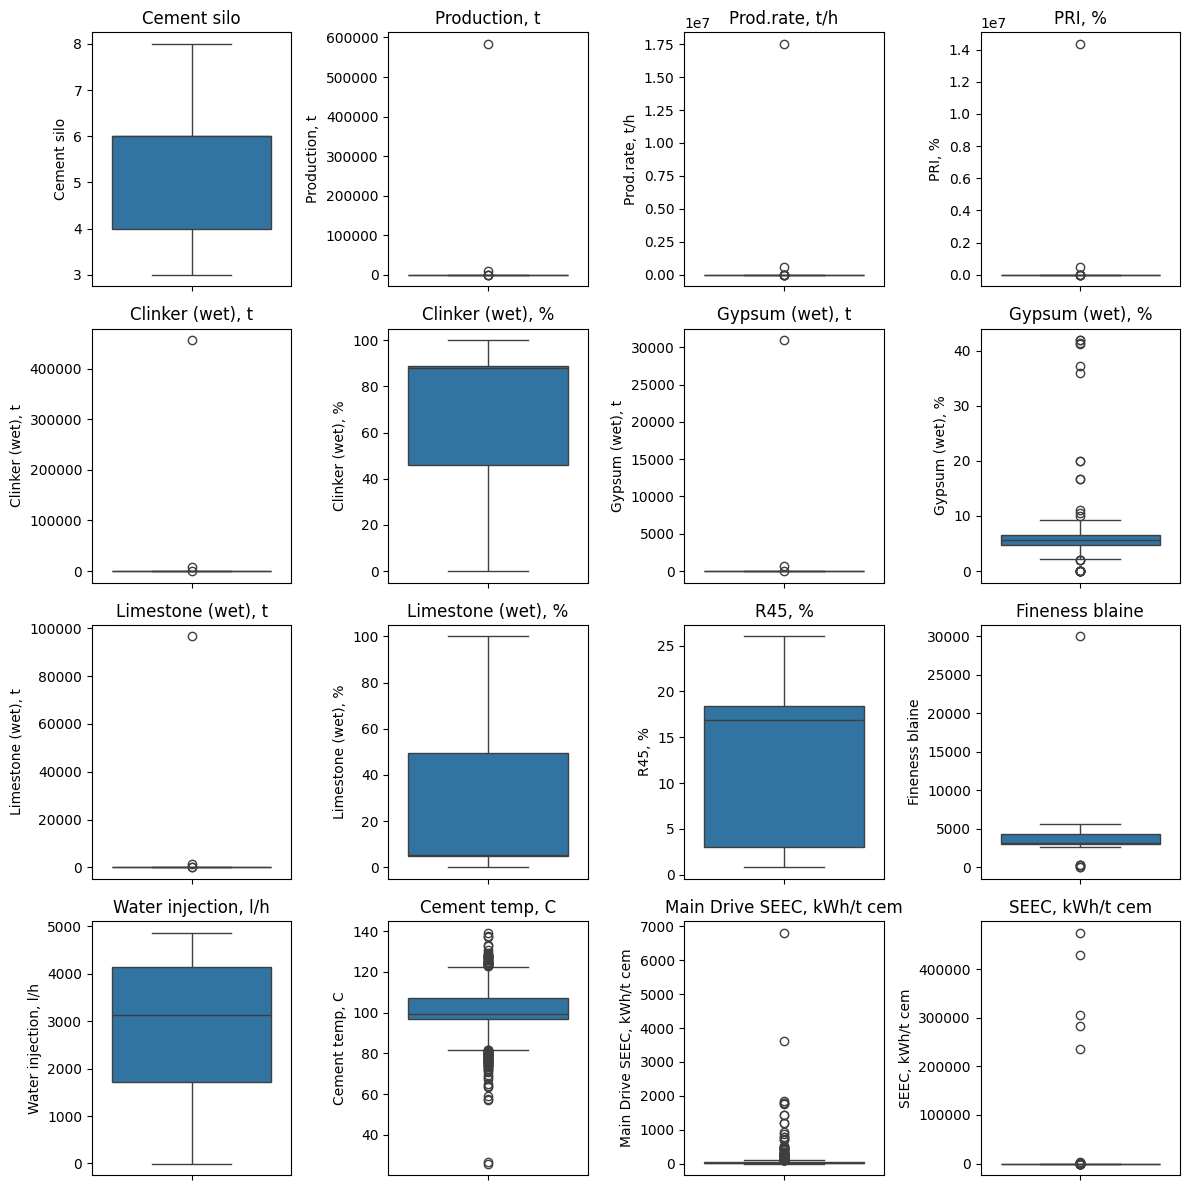

In [12]:
# get number of numeric columns
num_cols = len(df._get_numeric_data().columns)

# plot boxplots for all numeric columns in a subplot
n_cols = 4
n_rows = int(np.ceil(num_cols / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
for i, col in enumerate(df._get_numeric_data().columns):
    plt.subplot(n_rows, n_rows, i+1)
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()


Remove impractical values

In [13]:
# remove negative water injection values
df = df[df['Water injection, l/h'] > 0]

# remove temp. < 50
df = df[df['Cement temp, C'] > 50]

# remove prod. t > 200,000
df = df[df['Production, t'] < 200000]

# remove blaine > 10,000
df = df[df['Fineness blaine'] < 10000]

# remove SEEC > 100,000
df = df[df['SEEC, kWh/t cem'] < 100000]

# remove limestone > 20,000
df = df[df['Limestone (wet), t'] < 20000]

# remove gypsum > 10,000
df = df[df['Gypsum (wet), t'] < 10000]

df.describe()

Cement silo  Production, t  Prod.rate, t/h         PRI, %  \
count  3412.000000    3412.000000     3412.000000    3412.000000   
mean      5.623388     105.074590      273.576788     224.056155   
std       1.362161     166.536119     9880.707264    8098.942586   
min       3.000000       0.500000        2.000000       1.800000   
25%       4.000000      66.000000       67.000000      54.500000   
50%       6.000000     119.500000      120.000000      98.400000   
75%       6.000000     131.000000      131.000000     107.400000   
max       8.000000    9621.100000   577256.000000  473160.600000   

       Clinker (wet), t  Clinker (wet), %  Gypsum (wet), t  Gypsum (wet), %  \
count       3412.000000       3412.000000      3412.000000      3412.000000   
mean          83.690768         73.777902         6.204279         5.736108   
std          135.384100         21.654246        10.930327         1.938445   
min            0.000000          0.000000         0.000000         0.000000   
25%           30.000000         45.900000         3.000000         4.800000   
50%          106.000000         87.900000         6.500000         5.600000   
75%          116.000000         88.900000         8.000000         6.600000   
max         7612.000000        100.000000       624.500000        41.900000   

       Limestone (wet), t  Limestone (wet), %       R45, %  Fineness blaine  \
count         3412.000000         3412.000000  3412.000000      3412.000000   
mean            15.179631           20.486518    12.398353      3574.080627   
std             26.671854           22.247379     7.496379       741.036860   
min              0.000000            0.000000     0.800000         3.100000   
25%              6.500000            5.100000     3.000000      3000.000000   
50%              7.000000            5.500000    16.950000      3160.000000   
75%             29.500000           49.600000    18.400000      4390.000000   
max           1384.600000          100.000000    26.000000      5630.000000   

       Water injection, l/h  Cement temp, C  Main Drive SEEC, kWh/t cem  \
count           3412.000000     3412.000000                 3412.000000   
mean            2897.624062      101.721073                   49.725481   
std             1326.668238        8.578993                  157.672715   
min                1.600000       57.300000                    0.370000   
25%             1722.425000       97.075000                   26.930000   
50%             3142.550000       99.400000                   29.810000   
75%             4154.350000      107.200000                   53.555000   
max             4869.500000      139.200000                 6817.900000   

       SEEC, kWh/t cem  
count      3412.000000  
mean         49.805967  
std          72.497753  
min           0.000000  
25%          34.010000  
50%          36.955000  
75%          64.110000  
max        3404.300000

In [14]:
# create a helper function to remove outliers
def remove_outliers(df, col):
    # rows before filtering
    n_before = df.shape[0]

    # filter outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df = df[(df[col] > lower) & (df[col] < upper)]

    # rows after filtering
    n_after = df.shape[0]
    print(f"Removed {n_before - n_after} outliers for {col}. {n_after} rows remaining.")

    # return filtered dataframe
    return df

# remove outliers
df = remove_outliers(df, 'PRI, %')
df = remove_outliers(df, 'Prod.rate, t/h')
df = remove_outliers(df, 'Fineness blaine')
df = remove_outliers(df, 'SEEC, kWh/t cem')

Removed 6 outliers for PRI, %. 3406 rows remaining.
Removed 0 outliers for Prod.rate, t/h. 3406 rows remaining.
Removed 5 outliers for Fineness blaine. 3401 rows remaining.
Removed 56 outliers for SEEC, kWh/t cem. 3345 rows remaining.


<h3>Correlation Analysis</h3>

Calculate correlation between parameters

In [15]:
# calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

Cement silo  Production, t  Prod.rate, t/h  \
Cement silo                    1.000000      -0.485920       -0.513377   
Production, t                 -0.485920       1.000000        0.955066   
Prod.rate, t/h                -0.513377       0.955066        1.000000   
PRI, %                        -0.513244       0.954858        0.999964   
Clinker (wet), t              -0.552206       0.982579        0.968410   
Clinker (wet), %              -0.634172       0.861097        0.909098   
Gypsum (wet), t               -0.318866       0.918821        0.895691   
Gypsum (wet), %               -0.110635       0.596560        0.621692   
Limestone (wet), t             0.598930      -0.793499       -0.858041   
Limestone (wet), %             0.619068      -0.864053       -0.911789   
R45, %                        -0.488738       0.850859        0.899657   
Fineness blaine                0.555620      -0.849075       -0.893703   
Water injection, l/h          -0.504910       0.731892        0.765118   
Cement temp, C                -0.208211       0.518222        0.465509   
Main Drive SEEC, kWh/t cem     0.409941      -0.891714       -0.796647   
SEEC, kWh/t cem                0.425393      -0.750012       -0.754064   

                              PRI, %  Clinker (wet), t  Clinker (wet), %  \
Cement silo                -0.513244         -0.552206         -0.634172   
Production, t               0.954858          0.982579          0.861097   
Prod.rate, t/h              0.999964          0.968410          0.909098   
PRI, %                      1.000000          0.968272          0.909087   
Clinker (wet), t            0.968272          1.000000          0.936762   
Clinker (wet), %            0.909087          0.936762          1.000000   
Gypsum (wet), t             0.895614          0.907698          0.810934   
Gypsum (wet), %             0.621798          0.615057          0.611495   
Limestone (wet), t         -0.858114         -0.891719         -0.978855   
Limestone (wet), %         -0.911783         -0.938187         -0.999132   
R45, %                      0.899656          0.906380          0.921207   
Fineness blaine            -0.893714         -0.902691         -0.920432   
Water injection, l/h        0.765041          0.789757          0.821658   
Cement temp, C              0.465312          0.524006          0.476936   
Main Drive SEEC, kWh/t cem -0.796260         -0.846969         -0.709796   
SEEC, kWh/t cem            -0.753950         -0.747907         -0.692086   

                            Gypsum (wet), t  Gypsum (wet), %  \
Cement silo                       -0.318866        -0.110635   
Production, t                      0.918821         0.596560   
Prod.rate, t/h                     0.895691         0.621692   
PRI, %                             0.895614         0.621798   
Clinker (wet), t                   0.907698         0.615057   
Clinker (wet), %                   0.810934         0.611495   
Gypsum (wet), t                    1.000000         0.850922   
Gypsum (wet), %                    0.850922         1.000000   
Limestone (wet), t                -0.777626        -0.630066   
Limestone (wet), %                -0.828927        -0.643875   
R45, %                             0.810304         0.605957   
Fineness blaine                   -0.777145        -0.544055   
Water injection, l/h               0.693107         0.508967   
Cement temp, C                     0.521139         0.397298   
Main Drive SEEC, kWh/t cem        -0.802559        -0.503933   
SEEC, kWh/t cem                   -0.674227        -0.434909   

                            Limestone (wet), t  Limestone (wet), %    R45, %  \
Cement silo                           0.598930            0.619068 -0.488738   
Production, t                        -0.793499           -0.864053  0.850859   
Prod.rate, t/h                       -0.858041           -0.911789  0.899657   
PRI, %                               -0.858114           -0.911783 

Visualize the correlation between parameters

<Axes: >

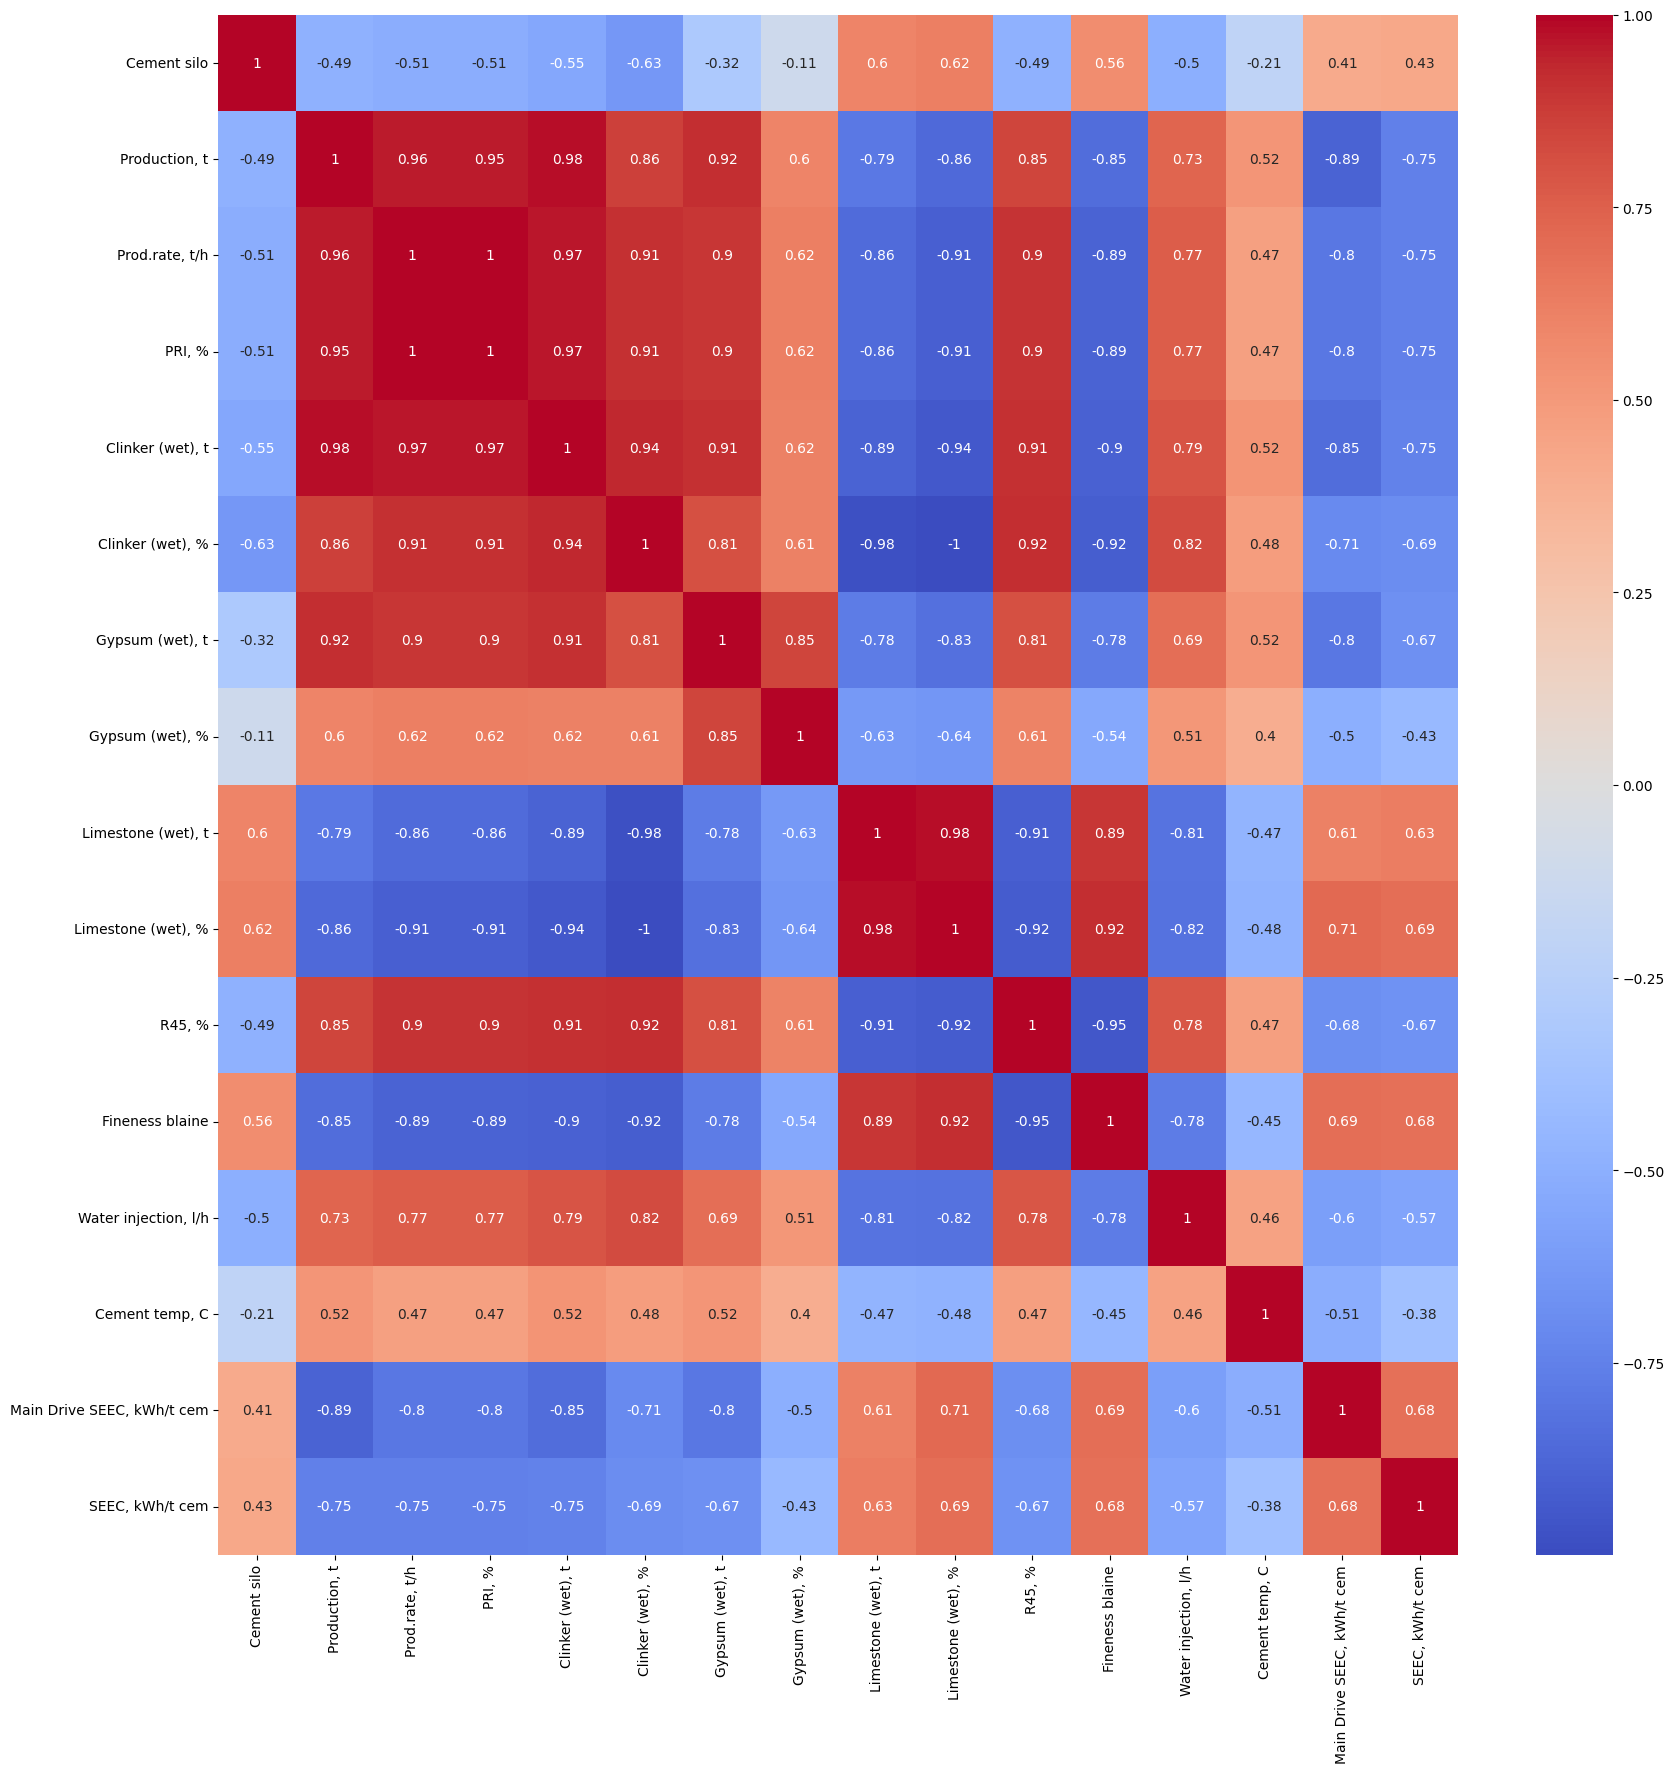

In [16]:
# plot correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Visualize the correlation trends

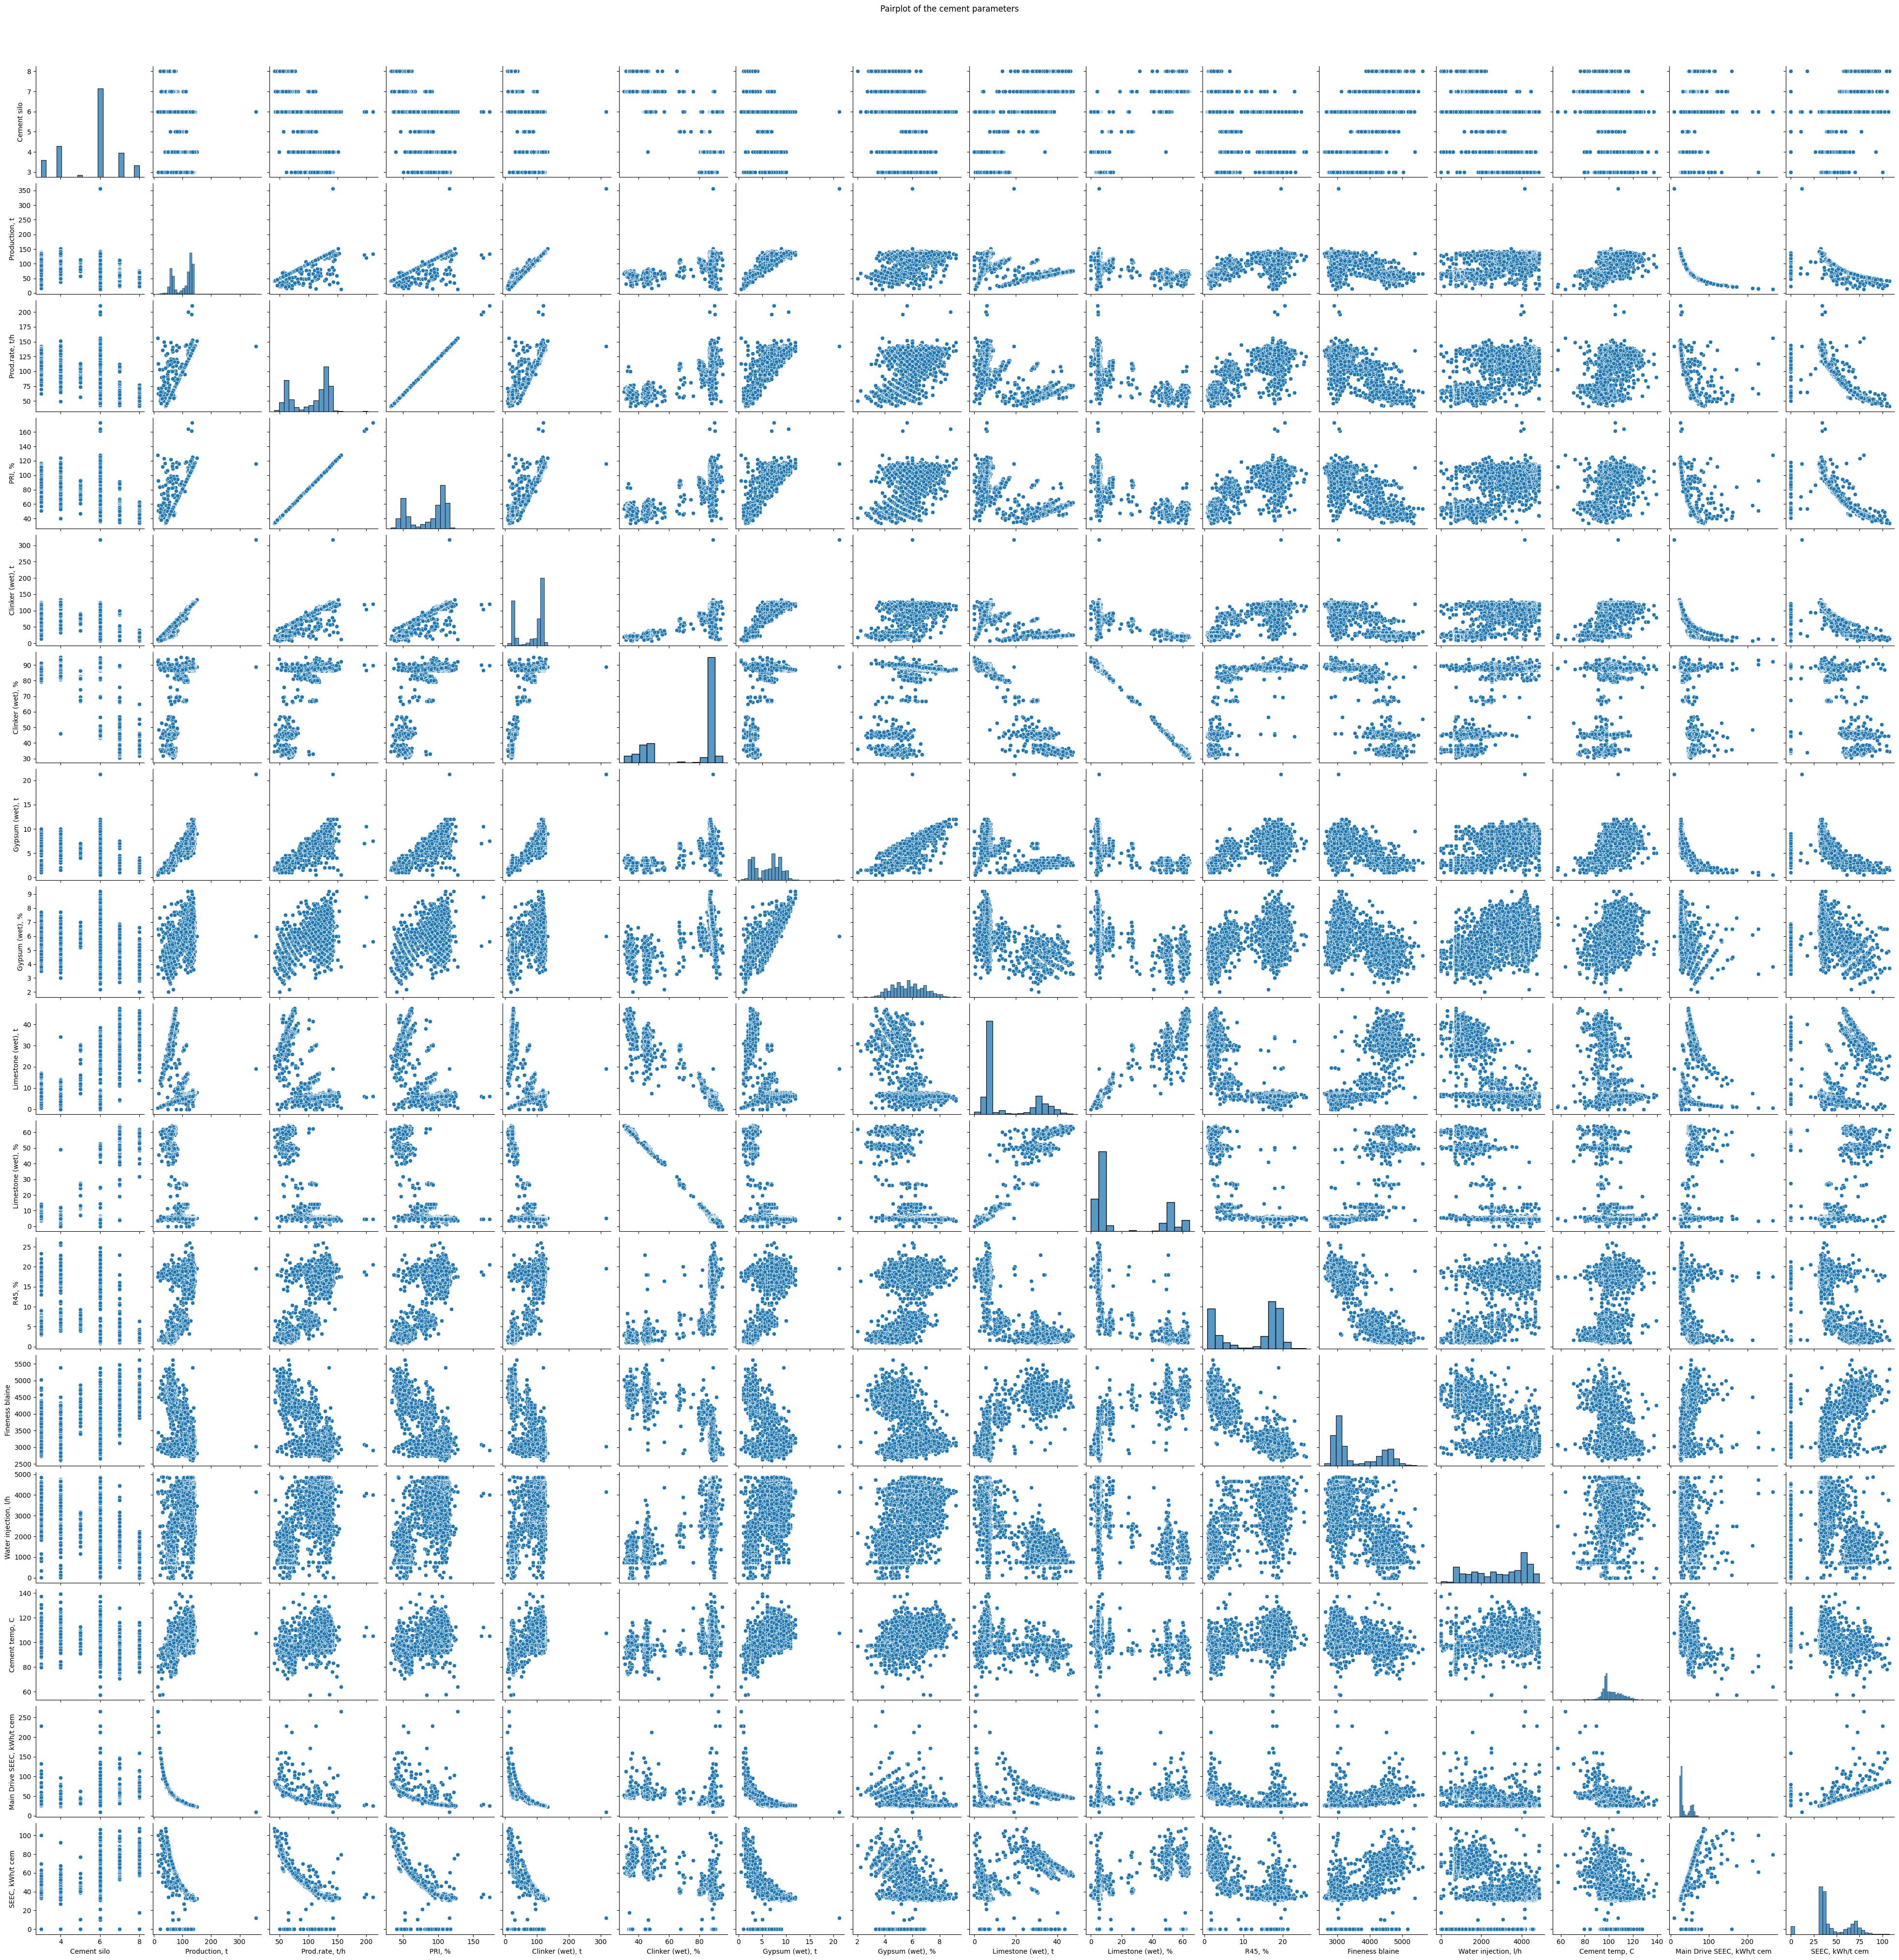

In [17]:
# plot scatter matrix (pairplot)
# pd.plotting.scatter_matrix(df.drop('Cement Type', axis=1), figsize=(20, 20), diagonal='hist')
sns.pairplot(df.drop('Cement Type', axis=1))

# add figure title
plt.suptitle('Pairplot of the cement parameters', y=1.02)

plt.show()

Convert **Cement Type** to numerical using one-hot encoding

In [18]:
df['Cement Type'].value_counts()

Cement Type
C14N        2123
C3A4N-50     733
C3A4N-60     307
CPP4         146
C2BL3N        36
Name: count, dtype: int64

In [19]:
# "one-hot" encode the "Cement type" column
# df = pd.get_dummies(df, columns=['Cement Type'])

cement_types = df['Cement Type'].unique()
cement_map = {}
for i, type in enumerate(cement_types):
    cement_map[type] = i

print(cement_map)

df['Cement Type'] = df['Cement Type'].map(cement_map)

df.head()

{'C14N': 0, 'C3A4N-60': 1, 'C3A4N-50': 2, 'C2BL3N': 3, 'CPP4': 4}


Cement Type  Cement silo  Production, t  Prod.rate, t/h  PRI, %  \
1             0          4.0          128.0           128.0   104.9   
3             0          4.0          128.0           128.0   104.9   
7             0          4.0          130.5           131.0   107.0   
9             0          4.0          135.0           135.0   110.7   
11            0          4.0          130.5           131.0   107.0   

    Clinker (wet), t  Clinker (wet), %  Gypsum (wet), t  Gypsum (wet), %  \
1              114.0              89.1              7.5              5.9   
3              114.0              89.1              7.5              5.9   
7              116.0              88.9              8.5              6.5   
9              120.0              88.9              9.5              7.0   
11             116.0              88.9              9.0              6.9   

    Limestone (wet), t  Limestone (wet), %  R45, %  Fineness blaine  \
1                  6.5                 5.1    17.6           3000.0   
3                  6.5                 5.1    18.0           3060.0   
7                  6.0                 4.6    18.0           3020.0   
9                  5.5                 4.1    19.0           5380.0   
11                 5.5                 4.2    18.0           2940.0   

    Water injection, l/h  Cement temp, C  Main Drive SEEC, kWh/t cem  \
1                 3297.6            98.1                       28.40   
3                 3572.3           100.4                       28.11   
7                 4162.9           101.2                       27.54   
9                 3339.0            96.8                       26.65   
11                2473.3            98.0                       27.66   

    SEEC, kWh/t cem  
1             35.62  
3             35.34  
7             34.60  
9             33.39  
11            34.98

<hr id="model">

<h2>5. Model Development and Evaluation</h2>

Let's first define a helper function to automate evaluating different models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline

# get x and y
x = df.drop('R45, %', axis=1)
y = df['R45, %']

# helper function to fit the model and evaluate it
def fit_model(model, x, y):
    # split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # fit the model on the training set
    model.fit(x_train, y_train)

    # predict the output on the training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # evaluate the model on the training and testing sets
    print('Training set:')
    print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
    print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
    print('R2: {:.2f}'.format(r2_score(y_train, y_train_pred)))
    print()
    print('Test set:')
    print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
    print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
    print('R2: {:.2f}'.format(r2_score(y_test, y_test_pred)))        
    
    # create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # plot actual vs. predicted values for the training and testing sets
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Training set')
    plt.scatter(y_test, y_test_pred, label='Test set')
    plt.plot(y, y, 'k')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Actual vs. Predicted values')
    plt.legend()
    
    # plot residuals vs. predicted values for the testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_train_pred, y_train_pred - y_train, label='Training set')
    plt.scatter(y_test_pred, y_test_pred - y_test, label='Test set')
    plt.axhline(y=0, color='k')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted values')
    plt.legend()

    # show the plots
    plt.show()

### Linear Regression

Training set:
MSE: 2.77
RMSE: 1.67
R2: 0.95

Test set:
MSE: 2.17
RMSE: 1.47
R2: 0.96


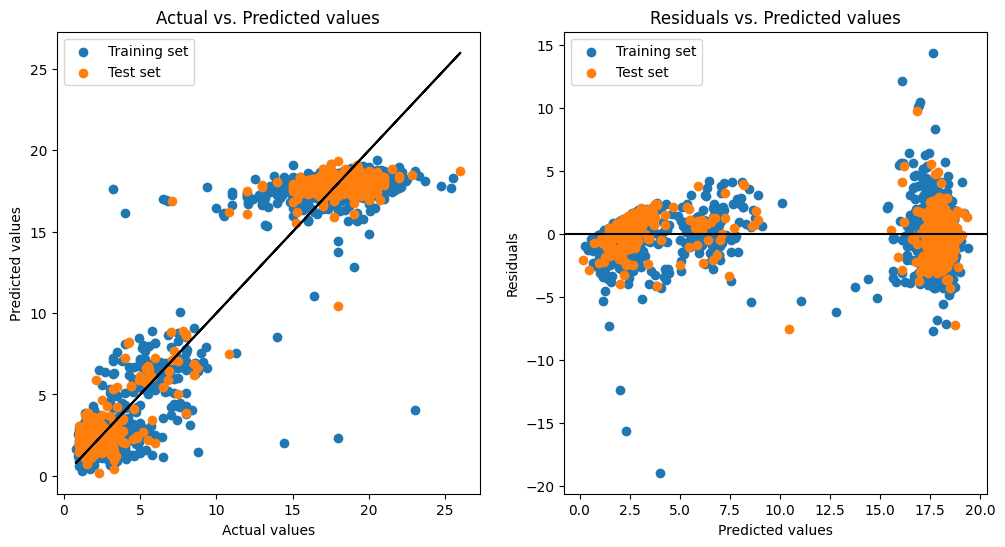

In [21]:
from sklearn.linear_model import LinearRegression

# create a linear regression model
lr_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# fit the model and evaluate it
fit_model(lr_pipe, x, y)

### Polynomial Regression

Training set:
MSE: 2.08
RMSE: 1.44
R2: 0.96

Test set:
MSE: 2.65
RMSE: 1.63
R2: 0.95


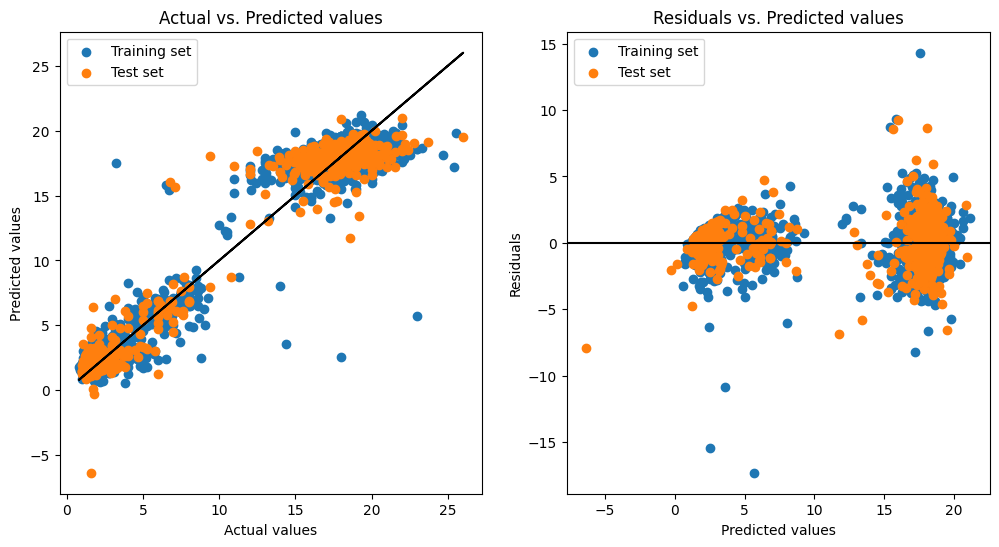

In [22]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# create a polynomial regression model
poly_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

# fit the model and evaluate it
fit_model(poly_pipe, x, y)

### SVM

Training set:
MSE: 2.56
RMSE: 1.60
R2: 0.95

Test set:
MSE: 2.39
RMSE: 1.55
R2: 0.96


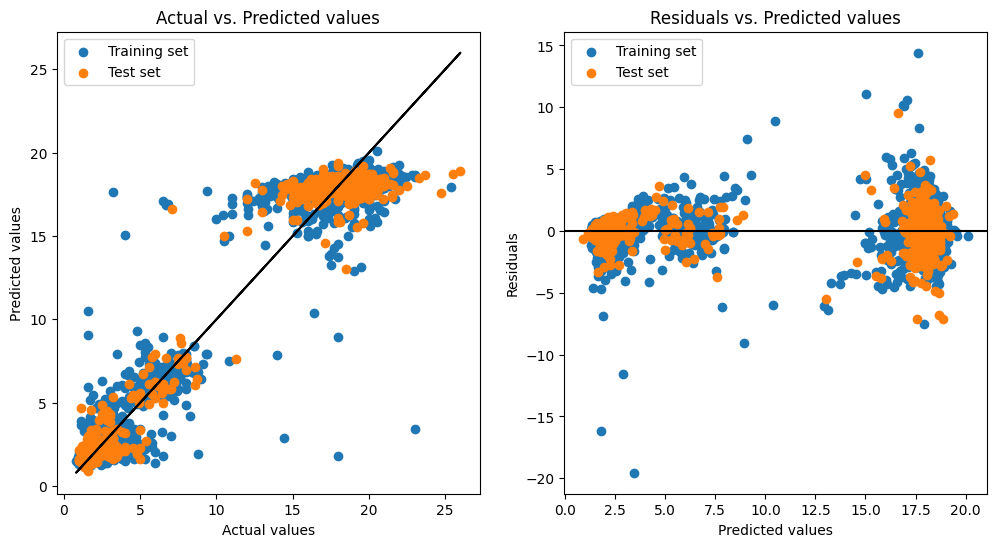

In [23]:
# SVM Regression
from sklearn.svm import SVR

# create an SVM regression model
svm_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

# fit the model and evaluate it
fit_model(svm_pipe, x, y)

### Decision Tree Regression

Training set:
MSE: 0.00
RMSE: 0.00
R2: 1.00

Test set:
MSE: 4.20
RMSE: 2.05
R2: 0.93


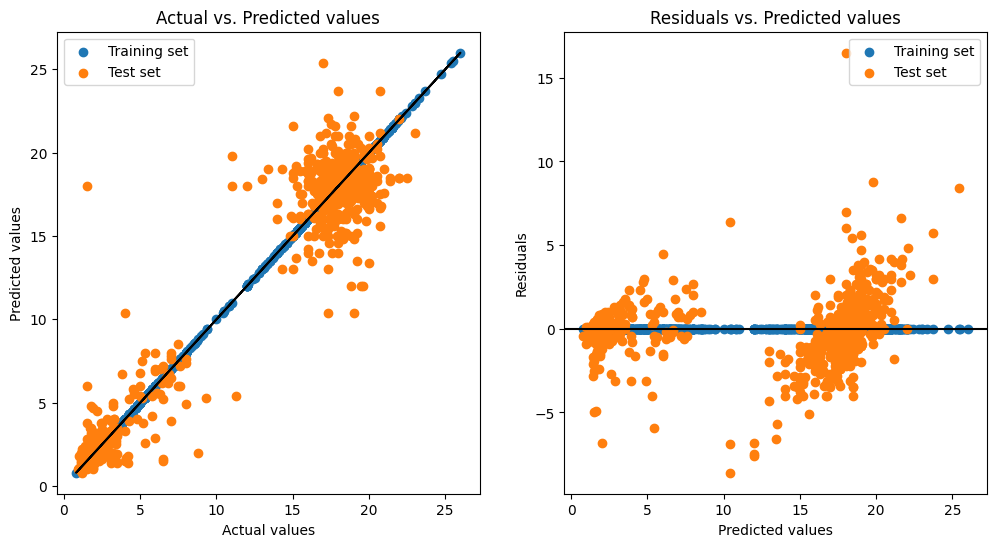

In [24]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# create a decision tree regression model
dt_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor())
])

# fit the model and evaluate it
fit_model(dt_pipe, x, y)

### Extra Tree

Training set:
MSE: 0.00
RMSE: 0.00
R2: 1.00

Test set:
MSE: 2.78
RMSE: 1.67
R2: 0.95


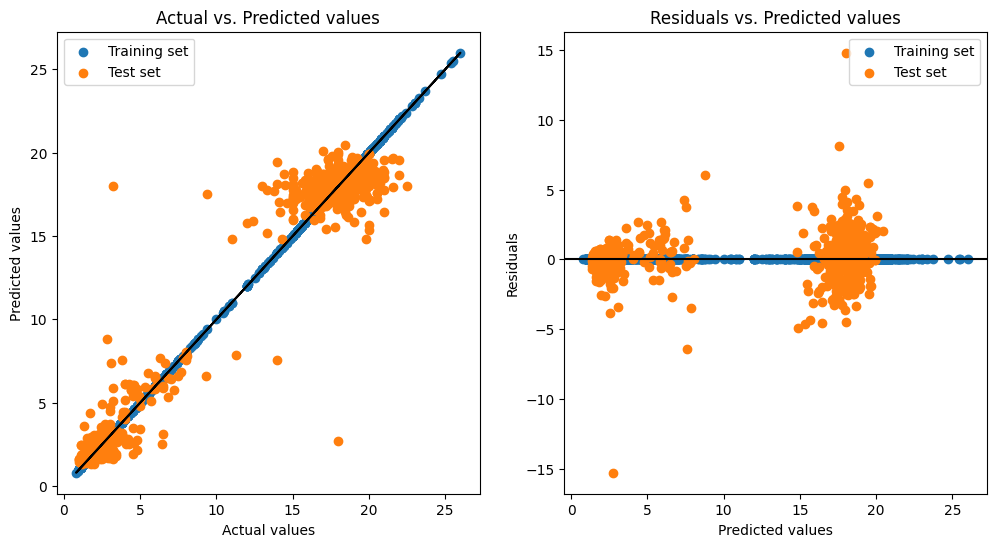

In [25]:
# Extra Trees Regression
from sklearn.ensemble import ExtraTreesRegressor

# create an extra trees regression model
et_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesRegressor())
])

# fit the model and evaluate it
fit_model(et_pipe, x, y)

### Random Forest

Training set:
MSE: 0.33
RMSE: 0.58
R2: 0.99

Test set:
MSE: 2.23
RMSE: 1.49
R2: 0.96


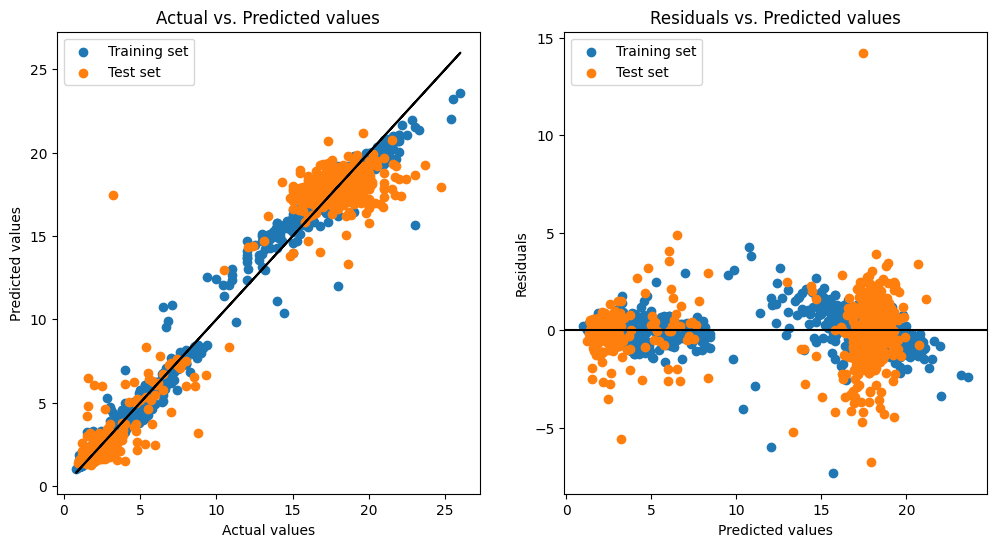

In [26]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# create a random forest regression model
rf_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

# fit the model and evaluate it
fit_model(rf_pipe, x, y)

### Neural Network

Training set:
MSE: 1.57
RMSE: 1.25
R2: 0.97

Test set:
MSE: 2.59
RMSE: 1.61
R2: 0.95


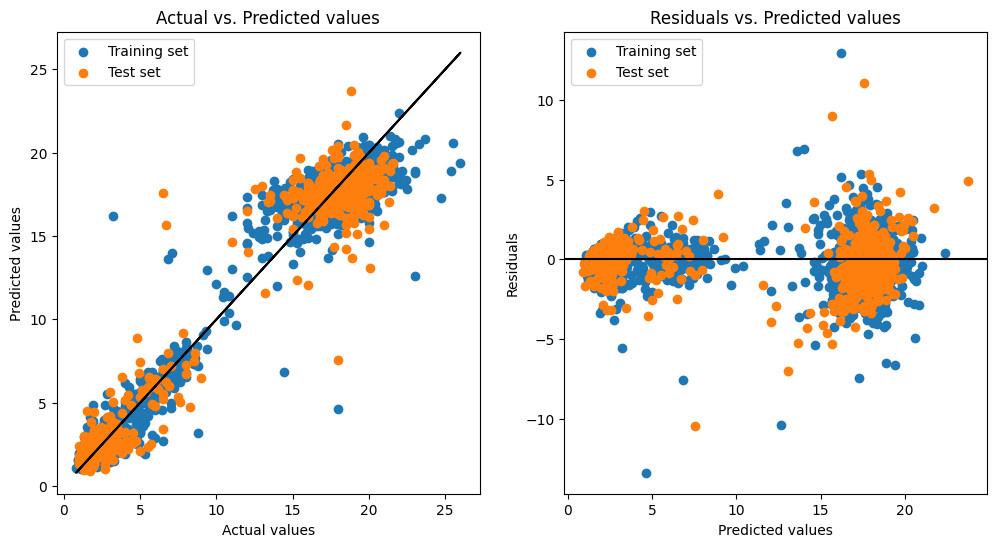

In [27]:
# neural network
from sklearn.neural_network import MLPRegressor

# create a neural network model
mlp_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(50, 100, 50, 200)))
])

# fit the model and evaluate it
fit_model(mlp_pipe, x, y)

<hr id="deploy">

<h2>6. Deployment and Communication</h2>

The findings of the project can be deployed in a dashboard.  

They can also be presented in a report format for written reporting or presentation purposes.  
The report should contain the following sections:
1. **Title Page**  
   *the title, name, and date*
2. **Outline (table of contents)**  
   *the different sections of the report (with page numbers for printed report)*
3. **Executive Summary**  
   *a summary/overview of the problem, methodology, findings, and conclusions*
4. **Introduction**  
   *problem statement and background*
5. **Methodology**  
   *description of the different data science project steps (data collection, cleaning, exploration, different models tested, etc.)*
6. **Results**  
   *the findings with visualization charts, etc.*
7. **Discussion**  
   *analysis of the findings*
8. **Conclusion**  
   *drawn conclusions based on the findings*
9. **Appendix**  
   *any supporting data, charts, etc. that were not used in the report but could be useful to review (if any)*


<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>
<a href="https://www.w3schools.com/python/default.asp">w3schools.com</a>